# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [4]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [2]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())



,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# TODO: retain only anual_income and spending_score for clustering
df = shopping_data[['annual_income', 'spending_score']]

### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

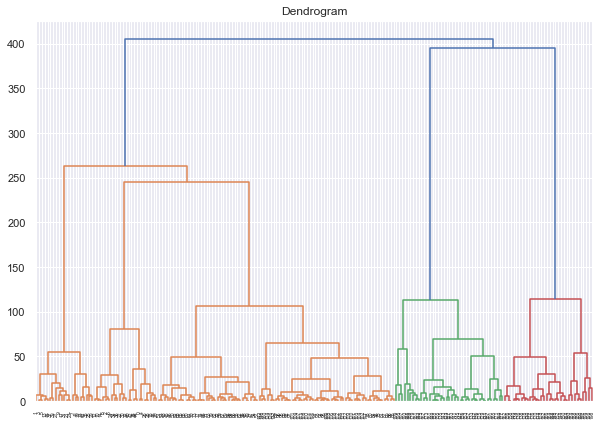

In [5]:
# TODO
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df,method='ward'))

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

Text(0.5, 0, 'spending_score')

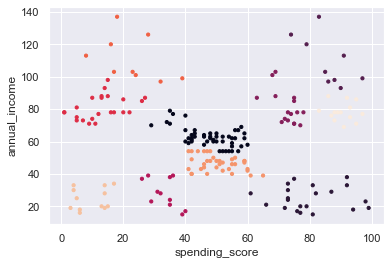

In [10]:
# TODO
from scipy.spatial.distance import euclidean
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
y_ward = hc.fit_predict(df) #fit and predict at the same time

plt.scatter(df['spending_score'], df['annual_income'], c=y_ward, s=10)
plt.ylabel('annual_income')
plt.xlabel('spending_score')

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

Text(0, 0.5, 'SSE')

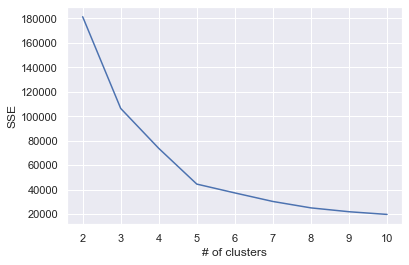

In [23]:
# TODO
from sklearn.cluster import KMeans
sse = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
plt.plot(range(2,11), sse)
plt.xlabel('# of clusters')
plt.ylabel('SSE')

In [ ]:
# I picked k=5, since SSE decreases much slower after k=5 (this is the elbow point)

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

In [25]:
# TODO
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y = kmeans.predict(df)

Text(0.5, 0, 'spending_score')

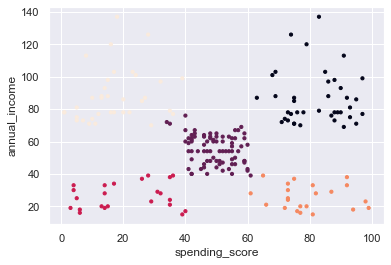

In [29]:
plt.scatter(df['spending_score'], df['annual_income'], c=y, s=10)
plt.ylabel('annual_income')
plt.xlabel('spending_score')

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

In [30]:
# Submit by excel file to show the process, the clusters are shown in yellow background on the sheet

## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [5]:
# Load the Relevant libraries
import sklearn as sk
import nltk
from collections import Counter

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO

In [113]:
# Turn titles into word count vectors
from sklearn.feature_extraction.text import CountVectorizer
vec1 = CountVectorizer()
vec1.fit(df['title']) # fit the entire corpus
title_vec = vec1.transform(aaai_data['title'])
title_vec = title_vec.toarray()

Text(0, 0.5, 'SSE')

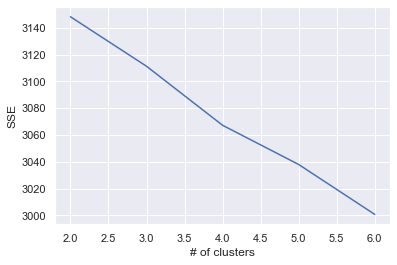

In [117]:
# Train k-means
from sklearn.cluster import KMeans
sse = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(title_vec)
    sse.append(kmeans.inertia_)
plt.plot(range(2,7), sse)
plt.xlabel('# of clusters')
plt.ylabel('SSE')

In [118]:
# There's no elbow in the plot, pick the 6 clusters
km = KMeans(n_clusters=6)
km.fit(title_vec)
y = km.predict(title_vec)
df = pd.DataFrame(aaai_data['title'])
df['gp'] = y

### From the most frequent words in each group, we can see that some groups are focused on specific topic, for example:
Group 1: natural, language, large

Group 2: Bayesian, clustering, linear, supervied

Group 4: image, classification, representation



## group 0

In [130]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==0]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('Description', 2),
 ('Logic', 2),
 ('Querying', 1),
 ('Inconsistent', 1),
 ('Knowledge', 1),
 ('Bases', 1),
 ('Preferred', 1),
 ('Repair', 1),
 ('Semantics,', 1),
 ('A', 1),
 ('Tractable', 1),
 ('Approach', 1),
 ('ABox', 1),
 ('Abduction', 1),
 ('Ontologies', 1)]

## group 1

In [131]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==1]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('Learning', 7),
 ('Modeling', 5),
 ('A', 5),
 ('Stochastic', 3),
 ('Model', 3),
 ('Social', 3),
 ('Planning', 3),
 ('Information', 2),
 ('Scalable', 2),
 ('Language', 2),
 ('via', 2),
 ('Natural', 2),
 ('Label', 2),
 ('Privacy', 2),
 ('Recommendation,', 2),
 ('Large', 2),
 ('Preference', 2),
 ('Elicitation', 2),
 ('Shaping', 2),
 ('Robust', 2)]

## group 2

In [136]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==2]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('A', 17),
 ('Learning', 15),
 ('via', 14),
 ('Learning,', 11),
 ('Based', 8),
 ('Online', 8),
 ('Sparse', 7),
 ('Social', 6),
 ('Probabilistic', 5),
 ('On', 5),
 ('Search,', 5),
 ('Transfer', 4),
 ('Robust', 4),
 ('Optimal', 4),
 ('Model', 4),
 ('Supervised', 4),
 ('Bayesian', 3),
 ('Clustering', 3),
 ('Information', 3),
 ('Linear', 3)]

## group 3

In [135]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==3]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('Learning', 9),
 ('A', 7),
 ('The', 7),
 ('On', 5),
 ('Social', 4),
 ('Complexity', 4),
 ('Efficient', 4),
 ('Models', 4),
 ('Computational', 3),
 ('Datalog', 3),
 ('Online', 3),
 ('Networks,', 3),
 ('Generalized', 3),
 ('Model', 3),
 ('Ontology', 3),
 ('Probabilistic', 2),
 ('Randomized', 2),
 ('Choice,', 2),
 ('Intelligent', 2),
 ('Reasoning', 2)]

## group 4

In [134]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==4]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('A', 16),
 ('Learning', 12),
 ('Image', 8),
 ('Classification,', 7),
 ('Search', 6),
 ('Local', 4),
 ('Probabilistic', 4),
 ('Model', 4),
 ('Social', 4),
 ('Multiple', 4),
 ('Models', 4),
 ('Tensor', 3),
 ('Supervised', 3),
 ('An', 3),
 ('Analysis,', 3),
 ('Semantic', 3),
 ('Representations', 3),
 ('Planning,', 3),
 ('Optimal', 3),
 ('Planning', 3)]

## group 5

In [133]:
# merge all titles in the group into one corpus
lst = []
for i in df[df['gp']==5]['title']:
    lst.append(i)
corp = str(lst)[2:-2].replace("\'", '')

# tokenize the corpus
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(corp)
stopwords_removed = [token for token in tokens if not token in stopwords.words('english')]

# Check most common words in the group
counter = Counter()
counter.update(stopwords_removed)
most_common = counter.most_common(20)
most_common

[('Using', 14),
 ('using', 13),
 ('Online', 3),
 ('Classification', 2),
 ('Information', 2),
 ('Robot', 2),
 ('Localization', 2),
 ('Model,', 2),
 ('Embedding', 2),
 ('Joint', 2),
 ('Voted', 1),
 ('RDA', 1),
 ('Method,', 1),
 ('Emotion', 1),
 ('Microblog', 1),
 ('Texts', 1),
 ('Class', 1),
 ('Sequential', 1),
 ('Rules,', 1),
 ('Solving', 1)]